# Esercitazione 8

Nella cartella sono presenti:
- Il makefile.
- I file di input/output.
- Il codice __main__.
- Il codice della classe __WaveFunction__.

<img src="Menu.png">

Prima di compilare eseguire i seguenti comandi da terminale, per includere le librerie __BlockAnalisys__ e __random__:
```bash
cd .. #Vado nella cartella con setup.sh
source setup.sh
```

Librerie utilizzate nel notebook:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

## 1 Ottimizzazione: Simulated Annealing

I principi variazionali si basano sulla minimazione dell'energia, quindi dato un sitema con una funzione d'onda $\Psi_T^{\sigma,\mu}(x)$ ed un potenziale $V(x)$, cambiando i parametri $\sigma,\mu$: possiamo cercare il minimo globale della __funzione costo__ $L(\sigma,\mu)$, cioè l'Hamiltoniana $\langle \hat{H} \rangle_T$.

Prendiamo:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

Analiticamente troviamo che:

$$
\frac{\partial^2}{\partial x^2}\Psi_{T}^{\sigma,\mu}(x)=\frac{\Psi_{T}^{\sigma,\mu}(x)}{\sigma^4}\left( x^2 + \mu^2 - \sigma^2 -2\,x\,\mu\,\tanh\left(\frac{x\,\mu}{\sigma}\right) \right)
$$

Quindi, visto che $\Psi_{T}^{\sigma,\mu}(x)$ è sempre diversa da $0$, abbiamo che:

$$
\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}= -\frac{\hbar^2}{2\,m\,\sigma^4}\left( x^2 + \mu^2 - \sigma^2 -2\,x\,\mu\,\tanh\left(\frac{x\,\mu}{\sigma}\right) \right)
$$

Da questo troviamo che dobbiamo calcolare la media della funzione
$$
-\frac{\hbar^2}{2\,m\,\sigma^4}\left( x^2 + \mu^2 - \sigma^2 -2\,x\,\mu\,\tanh\left(\frac{x\,\mu}{\sigma}\right) \right)+ x^4 - \frac{5}{2}x^2
$$
noi supprremo che $\hbar=1$ e $m=1$.

Utiliziamo un metodo *Metropolis* possiamo campionare il dominio di $x$ con una distribuzione $||\Psi_T^{\sigma,\mu}||^2$, per valutare il dominio.  Usiamo il metodo di ottimizzazione __simulated annealing__ per trovare i valori ottimali di $\sigma,\mu$.

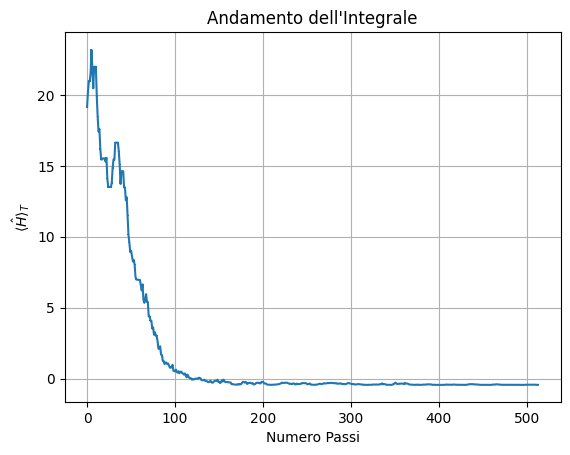

In [75]:
data=np.loadtxt("output_cost.dat")
dim = np.shape(data)[0]

plt.errorbar(np.linspace(0,dim,dim),data[:,1],yerr=data[:,2])

plt.xlabel("Numero Passi")
plt.ylabel(r"$\langle \hat{H} \rangle_T$")
plt.grid(True)
plt.title("Andamento dell'Integrale")
plt.show()

Come possiamo vedere dal'andamento dell'integrale il valore che troviamo è sicuramente vicino al minimo. Inoltre possiamo osservare che il valore dell'integrale fluttua maggiormente nei primi passi, quando la temperature del sistema è ancora alta e i valori sono liberi a __non__ seguire la discesa del gradiente.

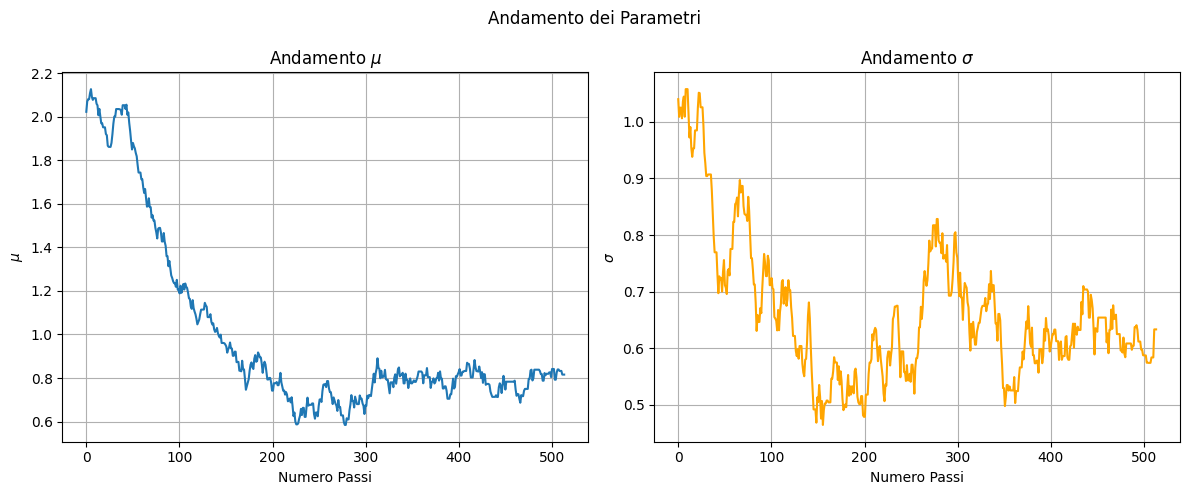

In [76]:
param=np.loadtxt("parameters.dat")

fig,ax=plt.subplots(1,2 ,figsize=(12,5))

ax[0].plot(np.linspace(0,dim,dim),param[:,0])
ax[1].plot(np.linspace(0,dim,dim),param[:,1],color="orange")

ax[0].set_title(r"Andamento $\mu$")
ax[1].set_title(r"Andamento $\sigma$")

ax[0].set(ylabel=r"$\mu$")
ax[1].set(ylabel=r"$\sigma$")

for i in range(2):
    ax[i].grid(True)
    ax[i].set(xlabel="Numero Passi")

fig.suptitle("Andamento dei Parametri")

plt.tight_layout()
plt.show()

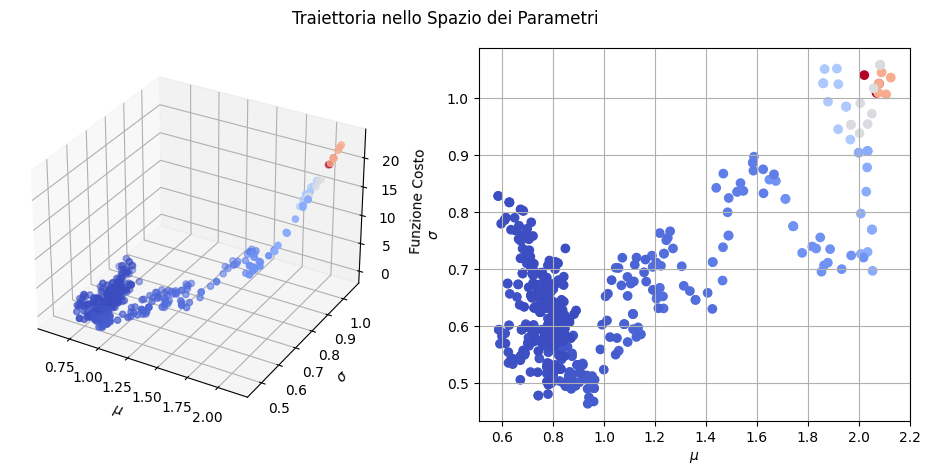

In [62]:
from matplotlib import cm

fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(param[:,0],param[:,1],data[:,1],marker='o', c=data[:,0],cmap=cm.coolwarm)
ax.set(
    xlabel=r"$\mu$",
    ylabel=r"$\sigma$",
    zlabel=r"Funzione Costo"
)

ax = fig.add_subplot(1, 2, 2)
ax.scatter(param[:,0],param[:,1],marker='o',c=data[:,0],cmap=cm.coolwarm)
ax.set(
    xlabel=r"$\mu$",
    ylabel=r"$\sigma$"
)
ax.grid()


fig.suptitle("Traiettoria nello Spazio dei Parametri")

plt.tight_layout()
plt.show()

Osserviamo l'andamento dei parametri e come varia la funzione costo e la temperatura con essi.

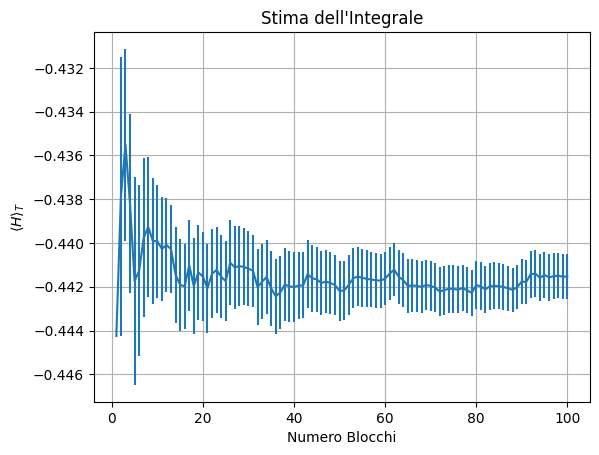

In [63]:
integ=np.loadtxt("output.dat")

plt.errorbar(integ[:,0],integ[:,2],yerr=integ[:,3])

plt.xlabel("Numero Blocchi")
plt.ylabel(r"$\langle H \rangle_T$")

plt.title("Stima dell'Integrale")

plt.grid(True)

plt.show()

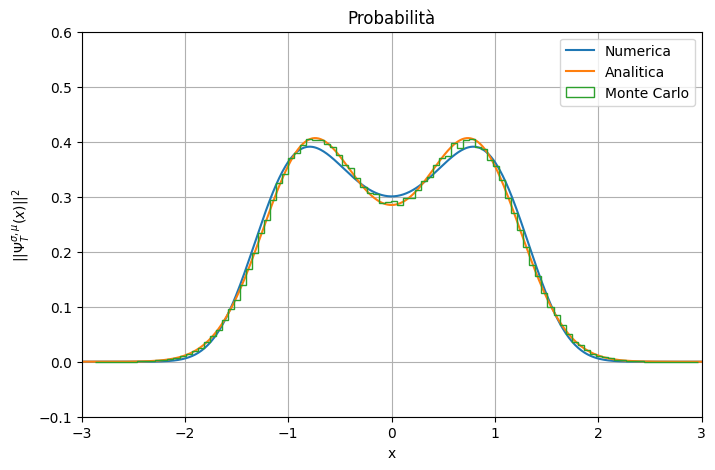

In [67]:
def Vpot(x):
    return (x**2 - 2.5)*x**2


def WFPsi(x):
    mu=param[-1,0]
    sigma=param[-1,1]
    return (np.exp(-0.5*((x-mu)/sigma)**2)+np.exp(-0.5*((x+mu)/sigma)**2))**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

# Ananlitical normalization
psi2min=WFPsi(x)/(a*np.mean(WFPsi(x)))

# Plot a few things
plt.figure(figsize=(8,5))
plt.plot(x,(psi[0])**2,label="Numerica")
plt.plot(x,psi2min,label="Analitica")
plt.title("Probabilità")
plt.xlabel("x")
plt.ylabel(r"$||\Psi_T^{\sigma,\mu}(x)||^2$")
plt.xlim((-3,3))
plt.ylim((-0.1,0.6))
plt.grid(True)

data=np.loadtxt("traj.dat")

plt.hist(data,100,density=True,histtype='step',label="Monte Carlo")
plt.legend()
plt.show()

Vediamo che il campionamento tramite *Metropolis* coincide con la distribuzione di $||\Psi_T^{\sigma,\mu}(x)||^2$, inoltre possiamo vedere che i valori ottenuti sono vicini ai valori ottenuti numericamente